# Central force motion

When the forces acting on an object always act some center point, you can use the conservation of angular momentum to relate radius, $r$, and angular velocity, $\dot{\theta}$ as such

- $\sum M_O = \frac{d}{dt}\left[r\hat{e}_r \times m(\dot{r}\hat{e}_r + r\dot{\theta}\hat{e}_\theta)\right]$
- $0 = \frac{d}{dt}\left[mr^2\dot{\theta}\right]\hat{k}$
- $mr^2\dot{\theta} = constant$

Consider the motion of ball on a frictionless table attached to a spring in Prob 4.13, 

![central force notes part I: ](./images/center-spring.svg)

## Kinematics in cylindrical coordinates

It helps to _see_ the motion to understand what's going on, the position of the ball is

$\mathbf{r} = x\hat{i} + y\hat{j} = r(\cos\theta\hat{i} + \sin\theta \hat{j})$

while its velocity and acceleration are represented in cylindrical coordinates

- $\mathbf{v} = \dot{x}\hat{i} + \dot{y}\hat{j} = \dot{r}\hat{e}_r + r\dot{\theta}\hat{e}_\theta$
- $\mathbf{a} = \ddot{x}\hat{i} + \ddot{y}\hat{j} = (\ddot{r}- r\dot{\theta}^2)\hat{e}_r + (r\ddot{\theta}+2\dot{r}\dot{\theta})\hat{e}_\theta$

## Kinetics of central spring force

The free body diagram has a single central spring force and the kinetic diagram include radial $a_r$ and transverse $a_\theta$ acceleration components, but no moment is applied

1. $\sum F_r = -k(r-L_0) = m(\ddot{r} - r\dot{\theta}^2)$
2. $\sum F_\theta = 0 = m(r\ddot{\theta} + 2\dot{r}\dot{\theta})$
3. $\sum M_O = 0 = \frac{d}{dt}\left(mr^2\dot{\theta}\right)$

## Equation of motion for central spring force

Combining equations 1&3, you have a single, second order differential equation that describes radius as a function of time, $r(t)$

$\ddot{r} = -\frac{k}{m}(r- L_0) + \frac{r_0^4\dot{\theta}_0^2}{r^3}$

where $r_0$ is the initial radius and $\dot{\theta}_0$ is the initial angular velocity. 

## Initial conditions due to Impulse

When an impulse, $F\Delta t$, is applied to a dynamic system, you have an _instantaneous_ change in momentum

$F\Delta t = \Delta mv$.

It also creates a _moment_ to create the initial angular momentum

$M\Delta t = \Delta \mathbf{h}_O(t=0)$

The impulse is gone after that initial impact. It gives you the _initial conditions_ of velocity and angular momentum,

- $\mathbf{v}(t=0) = v_0\left(\sin45^o\hat{i} + \cos45^o\hat{j}\right) = \dot{r}\hat{e}_r + r\dot{\theta}\hat{e}_\theta$
- $\mathbf{h}_O(t=0) = mL_0v_0\cos45^o = mr_0^2\dot{\theta}_0$



## Total solution and animation

Now, you have 
1. equation of motion in terms of $r~and~\ddot{r}$
2. initial conditions, $r(t=0)=L_0~and~\dot{r}(t=0) = \frac{v_O}{\sqrt{2}}$

So you can create a differential equation and integrate using the `solve_ivp`

In [18]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from scipy.integrate import solve_ivp

Here, you set up constants
- spring constant `k` in N/m
- unstretched spring length `L0` in m
- mass of ball `m` in kg
- initial speed `v0` in m/s _note: the direction is at a 45$^o$ angle_

and define the differential equation in 2 steps:

1. `dr[0] = r[1]` states $dr/dt = \dot{r}$
2. `dr[1] = -k/m*(r[0] - L0) +r[0]*(L0*v0/r[0])**2/2` gives the equation of motion solved for $\ddot{r}$

In [65]:
k = 100
L0 = 0.5
m = 0.5
v0 = 5

def my_ode(t, r):
    dr = np.zeros(len(r))
    dr[0] = r[1]
    dr[1] = -k/m*(r[0] - L0) +r[0]*(L0*v0/r[0])**2/2
    return dr

Integrate the equation of motion by using
- timespan `0` to `tend`
- initial conditions $r(t=0) = L_0~and~\dot{r}(t=0) = \frac{v_0}{\sqrt{2}}$ as `[L0, v0/2**0.5]`
- `sol = solve_ivp` integrates the equation of motion

the output for `sol` includes
- timesteps `sol.t`
- radius, $r(t)$ `sol.y[0]`
- radial velocity, $\dot{r}(t)$ `sol.y[1]`

Text(0, 0.5, 'radius (m)')

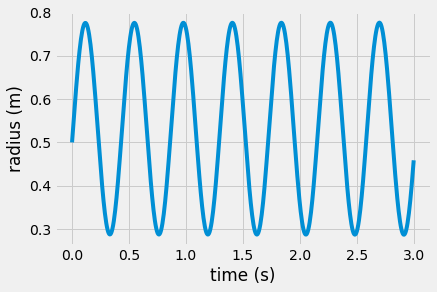

In [66]:
tend = 3
r0 = np.array([L0, v0/2**0.5])
sol = solve_ivp(my_ode, [0, tend], r0, t_eval = np.linspace(0, tend, 500))
plt.plot(sol.t, sol.y[0])
plt.xlabel('time (s)')
plt.ylabel('radius (m)')

You don't have an equation for $\theta(t)$, but you can use angular momentum to calculate $\dot{\theta}$

$\dot{\theta}(t) = \frac{h_O(t=0)}{r^2}$

then, the solution for $\theta = \sum\dot{\theta}dt$ or `np.cumsum(dtheta*sol.t[1]) - theta[0]`

Text(0, 0.5, '$\\theta$ (rad)')

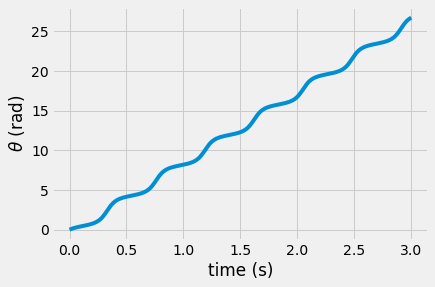

In [67]:
dtheta = L0*v0/2**0.5/sol.y[0]**2
theta = np.cumsum(dtheta*sol.t[1])
theta += -theta[0]
plt.plot(sol.t, theta)
plt.xlabel('time (s)')
plt.ylabel(r'$\theta$ (rad)')

Finally, you can get the $r-\theta$ coordinates back into $x-y$ coordinates and animate the motion

In [70]:
x = sol.y[0]*np.cos(theta)
y = sol.y[0]*np.sin(theta)

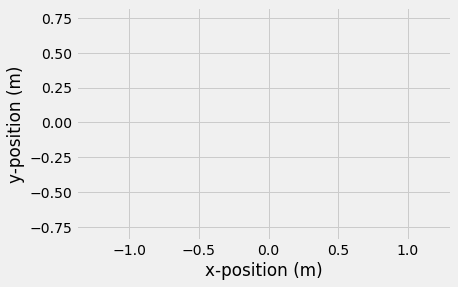

In [68]:
from matplotlib import animation
from IPython.display import HTML

fig, ax = plt.subplots()

#ax.set_xlim(( -30, 30))
# ax.set_ylim((1.5, -1.5))
ax.axis('equal')
ax.set_xlabel('x-position (m)')
ax.set_ylabel('y-position (m)')

line1, = ax.plot([], [],'-o')
line2, = ax.plot(x, y,'g--', alpha=0.5)

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return (line1, line2, )

def animate(i):
    '''function that updates the line and marker data
    arguments:
    ----------
    i: index of timestep
    outputs:
    --------
    line: the line object plotted in the above ax.plot(...)
    '''
    line1.set_data([0, x[i]], [0, y[i]])
    line2.set_data(x[0:i], y[0:i])
    return (line1, line2, )

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=range(0,len(sol.t)), interval=50, 
                               blit=True)

In [69]:
HTML(anim.to_html5_video())

## Wrapping up

In this notebook, you used conservation of angular momentum and Newton's
second law to create an equation of motion for the radius of a
spring-mass stationary table. Then, you plotted the results and
watched the path of the object over time. 

_Next steps_:
- What happens if you change the parameters of the system,
  $k,~L0,~etc.$?
- What happens if you change the initial impulse applied to the ball?